In [2]:
import cv2
import numpy as np 
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
kmeans = KMeans(n_clusters=3, random_state=0)


In [3]:
img = cv2.imread("./data/kir/-1/1599291935.6110709.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
h,s,v = cv2.split(img)


In [4]:
X = h
# X = h.reshape((1,h.shape[0],h.shape[1]))
# X = h.flatten()

print(X.shape)
X = np.reshape(X,(X.shape[0]*X.shape[1]))
# X = np.reshape((1,X.shape[0],X.shape[1]))
print(X.shape)
kmeans.fit(X)

print(kmeans.cluster_centers_.shape)

(30, 200)
(6000,)


ValueError: Expected 2D array, got 1D array instead:
array=[54. 52. 52. ... 49. 50. 52.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
plt.imshow(img)

In [3]:
img = cv2.imread("./data/kir/-1/1599294237.0983438.jpg")
# img = cv2.imread("./data/kir/0/1599292380.3199568.jpg")
img = img[10:20,:]
print(img.shape)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
kmeans = KMeans(n_clusters=2, random_state=0)
a = img
X = a.reshape((-1,3))
print("X shhape",X.shape)
# print(a)
kmeans.fit(X)
print(kmeans.cluster_centers_)
seg_img = kmeans.cluster_centers_[kmeans.labels_]
seg_img = seg_img.reshape(a.shape)
seg_img = seg_img.astype(dtype='uint8')

(10, 200, 3)
X shhape (2000, 3)
[[ 26.67570009  36.03432701  44.72899729]
 [102.88577828 165.95856663 182.33818589]]


In [14]:
# img = cv2.imread("./data/kir/-1/1599291891.953349.jpg")
# img = cv2.imread("./data/colours/lgreen/1600175118.4957118.jpg")
img = cv2.imread("./1600349692.0879188.jpg")
rgb_img =  cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rgb_img =rgb_img[2:13,:]
# img = cv2.imread("./data/kir/0/1599292380.3199568.jpg")
img = img[2:13,:]
print(img.shape)
img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img)
kmeans = KMeans(n_clusters=2, random_state=0)
a = img
X = a.reshape((-1,3))
print("X shhape",X.shape)
# print(a)
kmeans.fit(X)
print(kmeans.cluster_centers_)
center = np.array([[0,0,0],[255,255,255],[90,255,255]])
seg_img = center[kmeans.labels_]
# seg_img = kmeans.cluster_centers_[kmeans.labels_]
seg_img = seg_img.reshape(a.shape)
seg_img = seg_img.astype(dtype='uint8')

(11, 120, 3)
X shhape (1320, 3)
[[ 99.79919679 216.6746988  128.25702811]
 [ 96.87955182 245.85340803 240.45658263]]


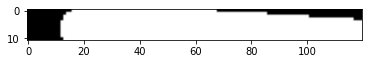

In [15]:
# print(seg_img)
plt.imshow(seg_img,cmap="gray")


(11, 120)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


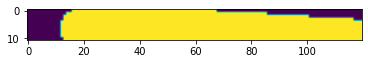

In [16]:
thread = seg_img[:,:,0]/255
# thread[:,:] = 1
print(thread.shape)
clas = 1
if thread.sum() < 1000:
    thread =  1-thread
    clas = 0
    print("hi")
print(thread[:,1])
plt.imshow(thread)

In [18]:



    

# print(thread[:,1].sum())
if clas == 1:
    for i in range(thread.shape[1]):
        img_sum = thread[:,i].sum()
        if img_sum > 0:
            thread[:,i] = 1
#         print(thread[:,i].sum())

else:
#     print("hi")
    for i in range(thread.shape[1]):
        img_sum = thread[:,i].sum()
        
        if img_sum < 10 and img_sum != 0:
            thread[:,i] = 1.0
#         print(thread[:,i].sum())
#     thread = 1 - thread
    

plt.imshow(thread)
thread = None
img_sum = None 
thread = None

AttributeError: 'NoneType' object has no attribute 'shape'

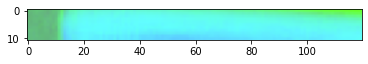

In [19]:
plt.imshow(img)

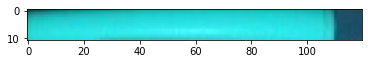

In [128]:
plt.imshow(rgb_img)

In [12]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [154]:
import time
def convert(img):
    img_name = img
    img = cv2.imread("./data/colours/dblue/"+img)
#     rgb_img =  cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    rgb_img = img
    rgb_img = rgb_img[2:13,15:-15]
    # img = cv2.imread("./data/kir/0/1599292380.3199568.jpg")
    img = img[2:13,15:-15]
#     print(img.shape)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
#     h,s,v = cv2.split(img)
    t = time.time()
    a = img
    X = a.reshape((-1,3))
#     print("X shhape",X.shape)
    # print(a)
    kmeans.fit(X)
    print(time.time()-t)
#     print(kmeans.cluster_centers_)
    center = np.array([[0,0,0],[255,255,255],[90,255,255]])
    seg_img = center[kmeans.labels_]
    # seg_img = kmeans.cluster_centers_[kmeans.labels_]
    seg_img = seg_img.reshape(a.shape)
    seg_img = seg_img.astype(dtype='uint8')
    thread = seg_img[:,:,0]/255
    
#     print(thread.sum())
    clas = 1
    if thread.sum() < 1000:
        thread =  1-thread
        clas = 0
#     plt.imshow(thread)  
    if clas == 1:
        for i in range(thread.shape[1]):
            img_sum = thread[:,i].sum()
            if img_sum > 0:
                thread[:,i] = 1
    #         print(thread[:,i].sum())

    else:
    #     print("hi")
        for i in range(thread.shape[1]):
            img_sum = thread[:,i].sum()

            if img_sum < 10 and img_sum != 0:
                thread[:,i] = 1.0
#             print(thread[:,i].sum())
    dir_save = "res_gray"
    print(thread.shape)
    cv2.imwrite("./data/kir/"+dir_save+"/"+img_name.split(".")[0]+"."+img_name.split(".")[1]+"_res.jpg",thread*255)
#     cv2.imwrite("./data/kir/"+dir_save+"/"+img_name,rgb_img)
#     cv2.imwrite("./data/kir/"+dir_save+"/"+img_name,np.vstack([rgb_img,cv2.cvtColor((thread*255).astype('uint8'),cv2.COLOR_GRAY2BGR)]))
#     plt.imshow(thread)
    return 0
    

In [155]:
import os
import time

# t = time.time()
# convert("1599291877.2396657.jpg")
# print(time.time()-t)

for i in os.listdir("./data/colours/dblue/"):
    convert(i) 

0.036473989486694336
(11, 130)
0.023394107818603516
(11, 130)
0.028836727142333984
(11, 130)
0.019087791442871094
(11, 130)
0.020226478576660156
(11, 130)
0.030198097229003906
(11, 130)
0.023512840270996094
(11, 130)
0.025427818298339844
(11, 130)
0.02470231056213379
(11, 130)
0.027371883392333984
(11, 130)
0.028516054153442383
(11, 130)
0.027085304260253906
(11, 130)
0.019382238388061523
(11, 130)
0.01964259147644043
(11, 130)
0.025141477584838867
(11, 130)
0.022139310836791992
(11, 130)
0.034009456634521484
(11, 130)
0.025844097137451172
(11, 130)
0.02256298065185547
(11, 130)
0.019843339920043945
(11, 130)
0.019339799880981445
(11, 130)
0.020442724227905273
(11, 130)
0.019709348678588867
(11, 130)
0.02649664878845215
(11, 130)
0.028112173080444336
(11, 130)
0.03507423400878906
(11, 130)
0.024594783782958984
(11, 130)
0.023984670639038086
(11, 130)
0.024904727935791016
(11, 130)
0.02566385269165039
(11, 130)
0.023201942443847656
(11, 130)
0.02315235137939453
(11, 130)
0.0225856304168

0.055001020431518555
(11, 130)
0.022266149520874023
(11, 130)
0.03738737106323242
(11, 130)
0.03417849540710449
(11, 130)
0.032698631286621094
(11, 130)
0.029953718185424805
(11, 130)
0.0277254581451416
(11, 130)
0.12955260276794434
(11, 130)
0.037955284118652344
(11, 130)
0.049579620361328125
(11, 130)
0.031072616577148438
(11, 130)
0.03608202934265137
(11, 130)
0.05872154235839844
(11, 130)
0.024872779846191406
(11, 130)
0.02277851104736328
(11, 130)
0.04634594917297363
(11, 130)
0.02159285545349121
(11, 130)
0.03766679763793945
(11, 130)
0.029419660568237305
(11, 130)


In [216]:
def createKrichi():   
    alpha = np.ones((11,130),dtype='uint8')
    rand1 = np.random.rand(1)+0.1
    rand2 = (np.random.rand(1)*0.75)+(rand1*0.25)
    rand2,rand1 = max(rand1,rand2) , min(rand1,rand2)
    rand1 = int(rand1*alpha.shape[1])
    print(rand1)
    rand2 = int(rand2*alpha.shape[1])
    print(rand2)

    # print(int(rand1))
    alpha[:,rand1:rand2] = 0
    cv2.imwrite("./data/kir/"+"res_gray"+"/"+str(time.time())+"_res.jpg",alpha*255)

In [217]:
for h in range(100):
    createKrichi()

39
52
24
98
76
104
51
84
44
104
107
121
127
140
91
121
93
110
44
45
18
79
105
127
76
112
21
85
15
85
83
122
85
131
20
29
64
78
69
84
87
87
94
141
99
102
39
57
28
45
91
111
18
66
49
99
61
134
19
53
37
112
114
129
109
130
63
102
42
58
93
114
64
138
106
109
96
103
24
28
36
136
13
24
46
98
24
32
38
42
105
127
64
142
95
133
28
38
54
95
54
121
106
135
33
44
21
82
20
87
59
126
49
90
32
94
93
126
91
105
86
103
41
52
94
101
25
26
21
46
77
102
23
94
80
123
36
123
45
96
41
64
116
120
24
67
44
64
15
29
81
108
99
118
104
123
58
123
31
78
55
68
27
62
20
58
73
90
74
107
93
112
116
134
36
47
37
64
89
102
31
101
85
110
81
102
15
81
40
109
55
110
96
122
60
120
48
80
13
25
